In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import preprocessing

# Decision Trees Classifier:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
training = pd.read_excel('credit-data-training.xlsx', sheet_name = 'Sheet1')
training.head(3)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1


In [13]:
round(1850000000/3500,2)


528571.43

In [14]:
#(250*35000000)/20000
10000000000/20000


500000.0

[Text(0.5, 1.0, 'No-of-Credits-at-this-Bank')]

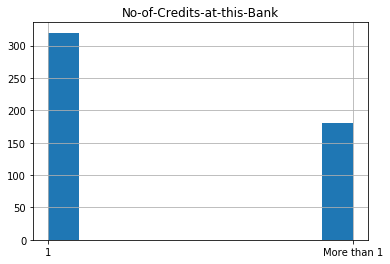

In [17]:
training['No-of-Credits-at-this-Bank'].hist().set(title='No-of-Credits-at-this-Bank')

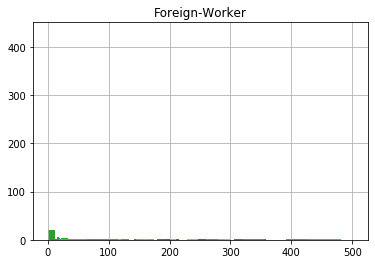

In [31]:
'Guarantors'
 'Duration-in-Current-address'
 'Concurrent-Credits'
 'Occupation'
 'No-of-dependents'
 'Foreign-Worker'
 'Telephone'

In [30]:
training.columns

Index(['Credit-Application-Result', 'Account-Balance',
       'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit',
       'Purpose', 'Credit-Amount', 'Value-Savings-Stocks',
       'Length-of-current-employment', 'Instalment-per-cent', 'Guarantors',
       'Duration-in-Current-address', 'Most-valuable-available-asset',
       'Age-years', 'Concurrent-Credits', 'Type-of-apartment',
       'No-of-Credits-at-this-Bank', 'Occupation', 'No-of-dependents',
       'Telephone', 'Foreign-Worker'],
      dtype='object')

[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020975902EF0>,
       dtype=object)]

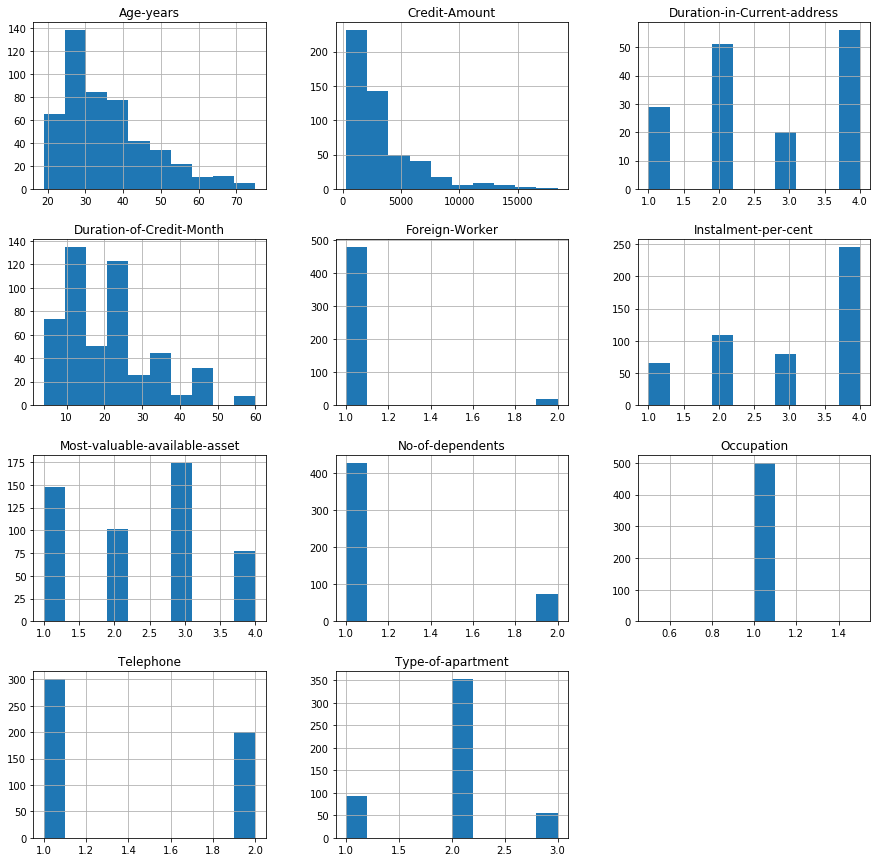

In [23]:
[training.hist(figsize=(15,15))]

In [22]:
[training[x].value_counts().hist() for x in training.columns]

[Creditworthy        358
 Non-Creditworthy    142
 Name: Credit-Application-Result, dtype: int64,
 No Account      262
 Some Balance    238
 Name: Account-Balance, dtype: int64,
 24    108
 12     92
 18     45
 36     41
 6      34
 9      27
 48     27
 15     24
 30     18
 21     13
 10     11
 60      8
 27      5
 8       5
 11      5
 42      5
 4       4
 45      4
 20      4
 28      3
 33      3
 7       3
 39      3
 14      2
 47      1
 26      1
 40      1
 16      1
 22      1
 13      1
 Name: Duration-of-Credit-Month, dtype: int64,
 Paid Up                       260
 No Problems (in this bank)    204
 Some Problems                  36
 Name: Payment-Status-of-Previous-Credit, dtype: int64,
 Home Related    355
 Used car         83
 New car          47
 Other            15
 Name: Purpose, dtype: int64,
 3017    3
 1258    3
 1154    2
 1549    2
 701     2
        ..
 3757    1
 7855    1
 4788    1
 2743    1
 1028    1
 Name: Credit-Amount, Length: 464, dtype: int64,


In [3]:
training['Credit-Application-Result'].value_counts()/len(training)

Creditworthy        0.716
Non-Creditworthy    0.284
Name: Credit-Application-Result, dtype: float64

In [7]:
training['Apt_phone_int'] = training['Telephone']*training['Type-of-apartment']
training.head(3)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,...,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker,Apt_phone_int
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,...,1,NaN,Other Banks/Depts,2,1,1,2,1,2,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,...,1,29.0,Other Banks/Depts,2,1,1,2,1,2,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,...,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1,2


In [13]:
import statsmodels.api as sm

In [22]:
y = training['No-of-dependents']
x = training[['Telephone', 'Type-of-apartment','Apt_phone_int']]
x = sm.add_constant(x)

In [23]:
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       No-of-dependents   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.900
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           0.000582
Time:                        22:39:21   Log-Likelihood:                -180.21
No. Observations:                 500   AIC:                             368.4
Df Residuals:                     496   BIC:                             385.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.8771      0.177      4.944      0.000       0.529       1.226
Telephone             0.0300      0.118      0.254      0.799      -0.202       0.262
Type-of-apartment     0.1744      0.090      1.948      0.052      -0.002       0.350
Apt_phone_int        -0.0401      0.058     -0.687      0.492      -0.155       0.075
==============================================================================
Omnibus:                      171.586   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.297
Skew:                           1.909   Prob(JB):                     4.33e-83
Kurtosis:                       4.907   Cond. No.                         59.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
y1 = y.map({1:0, 2:1})
model = sm.Logit(y1,x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.398160
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       No-of-dependents   No. Observations:                  500
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            3
Date:                Mon, 22 Jun 2020   Pseudo R-squ.:                 0.04221
Time:                        22:39:26   Log-Likelihood:                -199.08
converged:                       True   LL-Null:                       -207.85
Covariance Type:            nonrobust   LLR p-value:                 0.0005452
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.7337      1.665     -2.243      0.025      -6.997      -0.471
Telephone            -0.0338      1.130     -0.030      0.976      -2.249       2.181
Type-of-apartment     1.2542      0.774      1.620      0.105      -0.263       2.772
Apt_phone_int        -0.1853      0.513     -0.361      0.718      -1.191       0.821
=====================================================================================
"""

In [20]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               500 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         500 non-null    object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

In [1]:
800000/150

5333.333333333333

In [5]:
(4000000*400)/20000

80000.0

In [18]:
validation = pd.read_excel('customers-to-score.xlsx')
validation.head(3)

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,None,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,None,4,4,23,Other Banks/Depts,1,1,1,1,1,1


In [5]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Account-Balance                    500 non-null    object
 1   Duration-of-Credit-Month           500 non-null    int64 
 2   Payment-Status-of-Previous-Credit  500 non-null    object
 3   Purpose                            500 non-null    object
 4   Credit-Amount                      500 non-null    int64 
 5   Value-Savings-Stocks               500 non-null    object
 6   Length-of-current-employment       500 non-null    object
 7   Instalment-per-cent                500 non-null    int64 
 8   Guarantors                         500 non-null    object
 9   Duration-in-Current-address        500 non-null    int64 
 10  Most-valuable-available-asset      500 non-null    int64 
 11  Age-years                          500 non-null    int64 
 12  Concurre

In [6]:
# % of Null values in each field:

(training.isnull().sum()/len(training))*100

Credit-Application-Result             0.0
Account-Balance                       0.0
Duration-of-Credit-Month              0.0
Payment-Status-of-Previous-Credit     0.0
Purpose                               0.0
Credit-Amount                         0.0
Value-Savings-Stocks                  0.0
Length-of-current-employment          0.0
Instalment-per-cent                   0.0
Guarantors                            0.0
Duration-in-Current-address          68.8
Most-valuable-available-asset         0.0
Age-years                             2.4
Concurrent-Credits                    0.0
Type-of-apartment                     0.0
No-of-Credits-at-this-Bank            0.0
Occupation                            0.0
No-of-dependents                      0.0
Telephone                             0.0
Foreign-Worker                        0.0
dtype: float64

In [9]:
training.head(5)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [7]:
# Looking at the unique values in each columns:

print('Credit Application Result:', set(training['Credit-Application-Result']),
     '\nAccount Ballance:', set(training['Account-Balance']),
     '\nDuration-of-Credit-Month:', set(training['Duration-of-Credit-Month']),
     '\nPayment-Status-of-Previous-Credit:', set(training['Payment-Status-of-Previous-Credit']),
     '\nPurpose:', set(training['Purpose']),
     '\nCredit-Amount:', set(training['Credit-Amount']),
     '\nValue-Savings-Stocks:', set(training['Value-Savings-Stocks']),
     '\nLength-of-current-employment:', set(training['Length-of-current-employment']),
     '\nInstalment-per-cent:', set(training['Instalment-per-cent']),
     '\nGuarantors:', set(training['Guarantors']),
     '\nDuration-in-Current-address:', set(training['Duration-in-Current-address']),
     '\nMost-valuable-available-asset:', set(training['Most-valuable-available-asset']),
     '\nAge-years:', set(training['Age-years']),
     '\nConcurrent-Credits:', set(training['Concurrent-Credits']),
     '\nType-of-apartment:', set(training['Type-of-apartment']),
     '\nNo-of-Credits-at-this-Bank:', set(training['No-of-Credits-at-this-Bank']),
     '\nOccupation:', set(training['Occupation']),
     '\nNo-of-dependents:', set(training['No-of-dependents']),
     '\nTelephone:', set(training['Telephone']),
     '\nForeign-Worker:', set(training['Foreign-Worker']))

Credit Application Result: {'Creditworthy', 'Non-Creditworthy'} 
Account Ballance: {'No Account', 'Some Balance'} 
Duration-of-Credit-Month: {4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 26, 27, 28, 30, 33, 36, 39, 40, 42, 45, 47, 48, 60} 
Payment-Status-of-Previous-Credit: {'Paid Up', 'Some Problems', 'No Problems (in this bank)'} 
Purpose: {'Used car', 'Other', 'New car', 'Home Related'} 
Credit-Amount: {2063, 2064, 4113, 8229, 4139, 6187, 2100, 4151, 2108, 2116, 2121, 6224, 2134, 2141, 2142, 2145, 2150, 4210, 2169, 2171, 4221, 2181, 6288, 4241, 2197, 4249, 2212, 2221, 4272, 2225, 4280, 4281, 2235, 2238, 2241, 2246, 2247, 2249, 4297, 4308, 14555, 2273, 2279, 10477, 2288, 2292, 2299, 4351, 6403, 2315, 6419, 276, 2325, 2326, 2327, 2323, 4380, 2333, 12579, 2346, 2348, 6468, 12612, 2384, 339, 343, 4439, 2394, 2404, 2406, 4454, 4455, 362, 4473, 6527, 385, 2439, 12680, 8588, 2463, 8613, 4526, 433, 454, 8648, 2511, 2515, 6615, 2520, 2522, 4576, 10722, 484, 4591, 4594, 4611

In [30]:
[print(x, set(training[x])) for x in training.columns]

Credit-Application-Result {'Creditworthy', 'Non-Creditworthy'}
Account-Balance {'No Account', 'Some Balance'}
Duration-of-Credit-Month {4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 26, 27, 28, 30, 33, 36, 39, 40, 42, 45, 47, 48, 60}
Payment-Status-of-Previous-Credit {'Paid Up', 'Some Problems', 'No Problems (in this bank)'}
Purpose {'Used car', 'Other', 'New car', 'Home Related'}
Credit-Amount {2063, 2064, 4113, 8229, 4139, 6187, 2100, 4151, 2108, 2116, 2121, 6224, 2134, 2141, 2142, 2145, 2150, 4210, 2169, 2171, 4221, 2181, 6288, 4241, 2197, 4249, 2212, 2221, 4272, 2225, 4280, 4281, 2235, 2238, 2241, 2246, 2247, 2249, 4297, 4308, 14555, 2273, 2279, 10477, 2288, 2292, 2299, 4351, 6403, 2315, 6419, 276, 2325, 2326, 2327, 2323, 4380, 2333, 12579, 2346, 2348, 6468, 12612, 2384, 339, 343, 4439, 2394, 2404, 2406, 4454, 4455, 362, 4473, 6527, 385, 2439, 12680, 8588, 2463, 8613, 4526, 433, 454, 8648, 2511, 2515, 6615, 2520, 2522, 4576, 10722, 484, 4591, 4594, 4611, 2569, 2570

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

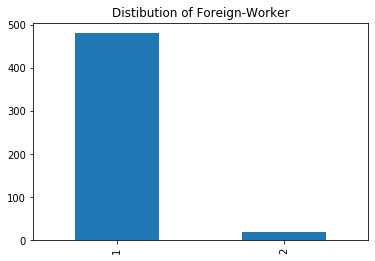

In [63]:

training['Foreign-Worker'].value_counts().plot(kind='bar',stacked=True, title='Distibution of Foreign-Worker')

In [19]:
impute = training[[ 'Guarantors',
 'Duration-in-Current-address',
 'Concurrent-Credits',
 'Telephone',
 'Occupation',
 'No-of-dependents',
 'Foreign-Worker']]

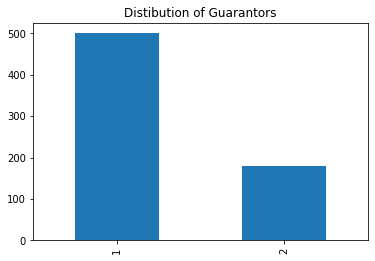

In [56]:
for x in impute.columns:
    training[x].value_counts().plot(kind='bar',stacked=True, title='Distibution of Guarantors')

In [18]:
training['Guarantors'].value_counts()

None    457
Yes      43
Name: Guarantors, dtype: int64

In [15]:
training['Instalment-per-cent'].value_counts()

4    246
2    109
3     79
1     66
Name: Instalment-per-cent, dtype: int64

In [19]:
training['Length-of-current-employment'].value_counts()

< 1yr      279
4-7 yrs    124
1-4 yrs     97
Name: Length-of-current-employment, dtype: int64

In [ ]:
training['Instalment-per-cent'].value_counts()

In [23]:
for x in training.columns:
    print(training[x].value_counts())

Creditworthy        358
Non-Creditworthy    142
Name: Credit-Application-Result, dtype: int64
No Account      262
Some Balance    238
Name: Account-Balance, dtype: int64
24    108
12     92
18     45
36     41
6      34
9      27
48     27
15     24
30     18
21     13
10     11
60      8
27      5
8       5
11      5
42      5
4       4
45      4
20      4
28      3
33      3
7       3
39      3
14      2
47      1
26      1
40      1
16      1
22      1
13      1
Name: Duration-of-Credit-Month, dtype: int64
Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: Payment-Status-of-Previous-Credit, dtype: int64
Home Related    355
Used car         83
New car          47
Other            15
Name: Purpose, dtype: int64
3017    3
1258    3
1154    2
1549    2
701     2
       ..
3757    1
7855    1
4788    1
2743    1
1028    1
Name: Credit-Amount, Length: 464, dtype: int64
None          298
£100-£1000    154
< £100         48
Name: Valu

In [25]:
[print(training[x].value_counts()) for x in training.columns]

Creditworthy        358
Non-Creditworthy    142
Name: Credit-Application-Result, dtype: int64
No Account      262
Some Balance    238
Name: Account-Balance, dtype: int64
24    108
12     92
18     45
36     41
6      34
9      27
48     27
15     24
30     18
21     13
10     11
60      8
27      5
8       5
11      5
42      5
4       4
45      4
20      4
28      3
33      3
7       3
39      3
14      2
47      1
26      1
40      1
16      1
22      1
13      1
Name: Duration-of-Credit-Month, dtype: int64
Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: Payment-Status-of-Previous-Credit, dtype: int64
Home Related    355
Used car         83
New car          47
Other            15
Name: Purpose, dtype: int64
3017    3
1258    3
1154    2
1549    2
701     2
       ..
3757    1
7855    1
4788    1
2743    1
1028    1
Name: Credit-Amount, Length: 464, dtype: int64
None          298
£100-£1000    154
< £100         48
Name: Valu

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [26]:
training['Purpose']

0             Other
1      Home Related
2      Home Related
3      Home Related
4      Home Related
           ...     
495           Other
496    Home Related
497    Home Related
498    Home Related
499    Home Related
Name: Purpose, Length: 500, dtype: object

In [74]:
# Selected X-Values after doing feature selection:

training1[[ 'Account-Balance',
 'Duration-of-Credit-Month',
 'Payment-Status-of-Previous-Credit',
 'Purpose',
 'Credit-Amount',
 'Value-Savings-Stocks',
 'Length-of-current-employment',
 'Instalment-per-cent',
 'Most-valuable-available-asset',
 'Age-years',
 'Type-of-apartment',
 'Telephone']]

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Telephone
0,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,1
3,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1
4,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,No Account,60,No Problems (in this bank),Other,7418,£100-£1000,< 1yr,1,1,33.0,2,1
496,No Account,60,No Problems (in this bank),Home Related,7418,£100-£1000,< 1yr,1,1,27.0,2,1
497,No Account,60,No Problems (in this bank),Home Related,9157,£100-£1000,< 1yr,2,4,27.0,3,1
498,Some Balance,60,No Problems (in this bank),Home Related,13756,£100-£1000,4-7 yrs,2,4,63.0,3,2


In [5]:
training['Credit-Application-Result'].value_counts().reset_index()

,index,Credit-Application-Result
0,Creditworthy,358
1,Non-Creditworthy,142


# Feature Engineering

In [20]:
#Fill Null Values in Age with the median age value
training['Age-years'].fillna(training['Age-years'].median(), inplace=True)


In [21]:
training['Age-years'].isnull().sum()

0

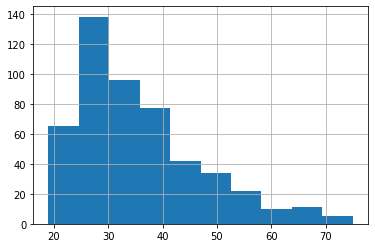

In [22]:
training['Age-years'].hist()

In [23]:
# Next I will map the values under certain columns:

training1 = training.copy()
training1.dtypes

Credit-Application-Result             object
Account-Balance                       object
Duration-of-Credit-Month               int64
Payment-Status-of-Previous-Credit     object
Purpose                               object
Credit-Amount                          int64
Value-Savings-Stocks                  object
Length-of-current-employment          object
Instalment-per-cent                    int64
Guarantors                            object
Duration-in-Current-address          float64
Most-valuable-available-asset          int64
Age-years                            float64
Concurrent-Credits                    object
Type-of-apartment                      int64
No-of-Credits-at-this-Bank            object
Occupation                             int64
No-of-dependents                       int64
Telephone                              int64
Foreign-Worker                         int64
dtype: object

In [24]:
training1['Credit-Application-Result1']=training1['Credit-Application-Result'].map({'Creditworthy':1, 'Non-Creditworthy':0})
training1['Credit-Application-Result1'].value_counts()

1    358
0    142
Name: Credit-Application-Result1, dtype: int64

In [25]:
training1['Account-Balance1'] =training1['Account-Balance'].map({'No Account':0, 'Some Balance':1})
training1['Account-Balance1'].value_counts()

0    262
1    238
Name: Account-Balance1, dtype: int64

In [26]:
training1['Payment-Status-of-Previous-Credit1'] = training1['Payment-Status-of-Previous-Credit'].map({'No Problems (in this bank)':0, 'Some Problems':1, 'Paid Up':2})
training1['Payment-Status-of-Previous-Credit1'].value_counts()

2    260
0    204
1     36
Name: Payment-Status-of-Previous-Credit1, dtype: int64

In [27]:
training1['Value-Savings-Stocks1'] = training1['Value-Savings-Stocks'].map({'< £100':1, '£100-£1000':2, 'None':0})
training1['Length-of-current-employment1'] = training1['Length-of-current-employment'].map({'1-4 yrs':1, '< 1yr':0, '4-7 yrs':2})
training1['Guarantors1'] = training1['Guarantors'].map({'Yes':1, 'None':0})


In [34]:
training1['No-of-Credits-at-this-Bank1']= training1['No-of-Credits-at-this-Bank'].map({'1':1, 'More than 1':2})
training1['No-of-Credits-at-this-Bank1'].value_counts()

1    320
2    180
Name: No-of-Credits-at-this-Bank1, dtype: int64

In [28]:
training1['Value-Savings-Stocks1'].value_counts()

0    298
2    154
1     48
Name: Value-Savings-Stocks1, dtype: int64

In [29]:
training1['Length-of-current-employment1'].value_counts()

0    279
2    124
1     97
Name: Length-of-current-employment1, dtype: int64

In [30]:
(training1['Guarantors1'].value_counts()/len(training1['Guarantors1']))*100

0    91.4
1     8.6
Name: Guarantors1, dtype: float64

In [36]:
# Final Set of Features Selected:

training1[[ 'Account-Balance1',
 'Duration-of-Credit-Month',
 'Payment-Status-of-Previous-Credit1',
 'Purpose',
 'Credit-Amount',
 'Value-Savings-Stocks1',
 'Length-of-current-employment1',
 'Instalment-per-cent',
 'Most-valuable-available-asset',
 'Age-years',
 'Type-of-apartment',
 'No-of-Credits-at-this-Bank1']].head(3)

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Purpose,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1
0,1,4,2,Other,1494,2,0,1,1,33.0,2,1
1,1,4,2,Home Related,1494,2,0,1,1,29.0,2,1
2,1,4,0,Home Related,1544,0,1,2,1,42.0,2,2


# Feature Selection

In [37]:
#training1.corr().to_excel('Training1_Correlation_Matrix.xlsx')

training2 = training1[['Account-Balance1',
 'Duration-of-Credit-Month',
 'Payment-Status-of-Previous-Credit1',
 'Purpose',
 'Credit-Amount',
 'Value-Savings-Stocks1',
 'Length-of-current-employment1',
 'Instalment-per-cent',
 'Most-valuable-available-asset',
 'Age-years',
 'Type-of-apartment',
 'No-of-Credits-at-this-Bank1']]
training2.head()

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Purpose,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1
0,1,4,2,Other,1494,2,0,1,1,33.0,2,1
1,1,4,2,Home Related,1494,2,0,1,1,29.0,2,1
2,1,4,0,Home Related,1544,0,1,2,1,42.0,2,2
3,1,4,0,Home Related,3380,0,1,1,1,37.0,2,1
4,0,6,2,Home Related,343,0,0,4,1,27.0,2,1


In [38]:
# Correlation Matrix
pd.get_dummies(training2).corr()*100

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Other,Purpose_Used car
Account-Balance1,100.000000,-10.106462,-10.319645,-13.372661,21.896039,7.975433,7.061827,-0.632782,7.417758,9.012127,9.444219,-3.512495,6.350767,2.018891,-1.623025
Duration-of-Credit-Month,-10.106462,100.000000,-8.012722,57.397971,0.278183,1.067059,6.810553,29.985487,-6.419695,15.251629,-1.969618,-0.110055,12.463653,-2.051123,-8.700851
Payment-Status-of-Previous-Credit1,-10.319645,-8.012722,100.000000,-5.138729,-3.200103,-12.067192,-4.050580,-7.305852,-18.351008,-10.453238,-63.650022,-0.810766,-5.203063,-0.833247,5.451612
Credit-Amount,-13.372661,57.397971,-5.138729,100.000000,-0.928897,-3.628637,-28.885153,32.554538,6.931589,17.007119,-5.378543,-9.682175,22.778500,0.441976,-6.260503
Value-Savings-Stocks1,21.896039,0.278183,-3.200103,-0.928897,100.000000,11.620814,1.872720,0.174384,4.287954,-3.424965,-1.453080,-0.369683,2.674409,6.883491,-4.802607
Length-of-current-employment1,7.975433,1.067059,-12.067192,-3.628637,11.620814,100.000000,16.545139,14.467395,32.538869,12.694556,7.319002,2.641768,6.157427,6.470500,-11.017592
Instalment-per-cent,7.061827,6.810553,-4.050580,-28.885153,1.872720,16.545139,100.000000,8.149260,3.926967,7.453322,5.692323,11.270451,-9.529048,5.110724,-8.613933
Most-valuable-available-asset,-0.632782,29.985487,-7.305852,32.554538,0.174384,14.467395,8.149260,100.000000,8.623342,37.310079,2.429766,-5.306348,14.877217,-4.851992,-2.972721
Age-years,7.417758,-6.419695,-18.351008,6.931589,4.287954,32.538869,3.926967,8.623342,100.000000,32.935038,12.424219,5.364076,6.698874,-1.508080,-11.104256
Type-of-apartment,9.012127,15.251629,-10.453238,17.007119,-3.424965,12.694556,7.453322,37.310079,32.935038,100.000000,5.377604,4.544305,4.300542,-4.174222,-7.001132


In [39]:
training3 = pd.get_dummies(training2)
training3.head(3)

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Other,Purpose_Used car
0,1,4,2,1494,2,0,1,1,33.0,2,1,0,0,1,0
1,1,4,2,1494,2,0,1,1,29.0,2,1,1,0,0,0
2,1,4,0,1544,0,1,2,1,42.0,2,2,1,0,0,0


In [41]:
training3.corr()*100

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Other,Purpose_Used car
Account-Balance1,100.000000,-10.106462,-10.319645,-13.372661,21.896039,7.975433,7.061827,-0.632782,7.417758,9.012127,9.444219,-3.512495,6.350767,2.018891,-1.623025
Duration-of-Credit-Month,-10.106462,100.000000,-8.012722,57.397971,0.278183,1.067059,6.810553,29.985487,-6.419695,15.251629,-1.969618,-0.110055,12.463653,-2.051123,-8.700851
Payment-Status-of-Previous-Credit1,-10.319645,-8.012722,100.000000,-5.138729,-3.200103,-12.067192,-4.050580,-7.305852,-18.351008,-10.453238,-63.650022,-0.810766,-5.203063,-0.833247,5.451612
Credit-Amount,-13.372661,57.397971,-5.138729,100.000000,-0.928897,-3.628637,-28.885153,32.554538,6.931589,17.007119,-5.378543,-9.682175,22.778500,0.441976,-6.260503
Value-Savings-Stocks1,21.896039,0.278183,-3.200103,-0.928897,100.000000,11.620814,1.872720,0.174384,4.287954,-3.424965,-1.453080,-0.369683,2.674409,6.883491,-4.802607
Length-of-current-employment1,7.975433,1.067059,-12.067192,-3.628637,11.620814,100.000000,16.545139,14.467395,32.538869,12.694556,7.319002,2.641768,6.157427,6.470500,-11.017592
Instalment-per-cent,7.061827,6.810553,-4.050580,-28.885153,1.872720,16.545139,100.000000,8.149260,3.926967,7.453322,5.692323,11.270451,-9.529048,5.110724,-8.613933
Most-valuable-available-asset,-0.632782,29.985487,-7.305852,32.554538,0.174384,14.467395,8.149260,100.000000,8.623342,37.310079,2.429766,-5.306348,14.877217,-4.851992,-2.972721
Age-years,7.417758,-6.419695,-18.351008,6.931589,4.287954,32.538869,3.926967,8.623342,100.000000,32.935038,12.424219,5.364076,6.698874,-1.508080,-11.104256
Type-of-apartment,9.012127,15.251629,-10.453238,17.007119,-3.424965,12.694556,7.453322,37.310079,32.935038,100.000000,5.377604,4.544305,4.300542,-4.174222,-7.001132


In [42]:
#training4 = training3.drop(columns=['Type-of-apartment','Telephone', 'Foreign-Worker','Guarantors1', 'Purpose_Home Related'])
training4 = training3.drop(columns=['Purpose_Other'])

In [43]:
training4.corr()*100

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Used car
Account-Balance1,100.000000,-10.106462,-10.319645,-13.372661,21.896039,7.975433,7.061827,-0.632782,7.417758,9.012127,9.444219,-3.512495,6.350767,-1.623025
Duration-of-Credit-Month,-10.106462,100.000000,-8.012722,57.397971,0.278183,1.067059,6.810553,29.985487,-6.419695,15.251629,-1.969618,-0.110055,12.463653,-8.700851
Payment-Status-of-Previous-Credit1,-10.319645,-8.012722,100.000000,-5.138729,-3.200103,-12.067192,-4.050580,-7.305852,-18.351008,-10.453238,-63.650022,-0.810766,-5.203063,5.451612
Credit-Amount,-13.372661,57.397971,-5.138729,100.000000,-0.928897,-3.628637,-28.885153,32.554538,6.931589,17.007119,-5.378543,-9.682175,22.778500,-6.260503
Value-Savings-Stocks1,21.896039,0.278183,-3.200103,-0.928897,100.000000,11.620814,1.872720,0.174384,4.287954,-3.424965,-1.453080,-0.369683,2.674409,-4.802607
Length-of-current-employment1,7.975433,1.067059,-12.067192,-3.628637,11.620814,100.000000,16.545139,14.467395,32.538869,12.694556,7.319002,2.641768,6.157427,-11.017592
Instalment-per-cent,7.061827,6.810553,-4.050580,-28.885153,1.872720,16.545139,100.000000,8.149260,3.926967,7.453322,5.692323,11.270451,-9.529048,-8.613933
Most-valuable-available-asset,-0.632782,29.985487,-7.305852,32.554538,0.174384,14.467395,8.149260,100.000000,8.623342,37.310079,2.429766,-5.306348,14.877217,-2.972721
Age-years,7.417758,-6.419695,-18.351008,6.931589,4.287954,32.538869,3.926967,8.623342,100.000000,32.935038,12.424219,5.364076,6.698874,-11.104256
Type-of-apartment,9.012127,15.251629,-10.453238,17.007119,-3.424965,12.694556,7.453322,37.310079,32.935038,100.000000,5.377604,4.544305,4.300542,-7.001132


In [44]:
len(training4.columns)

14

In [45]:
y = training1['Credit-Application-Result1']
y.value_counts()

1    358
0    142
Name: Credit-Application-Result1, dtype: int64

In [46]:
X=training4
X.head()

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Used car
0,1,4,2,1494,2,0,1,1,33.0,2,1,0,0,0
1,1,4,2,1494,2,0,1,1,29.0,2,1,1,0,0
2,1,4,0,1544,0,1,2,1,42.0,2,2,1,0,0
3,1,4,0,3380,0,1,1,1,37.0,2,1,1,0,0
4,0,6,2,343,0,0,4,1,27.0,2,1,1,0,0


In [47]:
# Convert Credit Amount & age to normalized 0 to 1
X.count().count()

14

In [48]:
X.corr()

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Used car
Account-Balance1,1.000000,-0.101065,-0.103196,-0.133727,0.218960,0.079754,0.070618,-0.006328,0.074178,0.090121,0.094442,-0.035125,0.063508,-0.016230
Duration-of-Credit-Month,-0.101065,1.000000,-0.080127,0.573980,0.002782,0.010671,0.068106,0.299855,-0.064197,0.152516,-0.019696,-0.001101,0.124637,-0.087009
Payment-Status-of-Previous-Credit1,-0.103196,-0.080127,1.000000,-0.051387,-0.032001,-0.120672,-0.040506,-0.073059,-0.183510,-0.104532,-0.636500,-0.008108,-0.052031,0.054516
Credit-Amount,-0.133727,0.573980,-0.051387,1.000000,-0.009289,-0.036286,-0.288852,0.325545,0.069316,0.170071,-0.053785,-0.096822,0.227785,-0.062605
Value-Savings-Stocks1,0.218960,0.002782,-0.032001,-0.009289,1.000000,0.116208,0.018727,0.001744,0.042880,-0.034250,-0.014531,-0.003697,0.026744,-0.048026
Length-of-current-employment1,0.079754,0.010671,-0.120672,-0.036286,0.116208,1.000000,0.165451,0.144674,0.325389,0.126946,0.073190,0.026418,0.061574,-0.110176
Instalment-per-cent,0.070618,0.068106,-0.040506,-0.288852,0.018727,0.165451,1.000000,0.081493,0.039270,0.074533,0.056923,0.112705,-0.095290,-0.086139
Most-valuable-available-asset,-0.006328,0.299855,-0.073059,0.325545,0.001744,0.144674,0.081493,1.000000,0.086233,0.373101,0.024298,-0.053063,0.148772,-0.029727
Age-years,0.074178,-0.064197,-0.183510,0.069316,0.042880,0.325389,0.039270,0.086233,1.000000,0.329350,0.124242,0.053641,0.066989,-0.111043
Type-of-apartment,0.090121,0.152516,-0.104532,0.170071,-0.034250,0.126946,0.074533,0.373101,0.329350,1.000000,0.053776,0.045443,0.043005,-0.070011


In [49]:
# Average Age:
print('Average Age:', X['Age-years'].mean(),
      '\n Median Age:',X['Age-years'].median()
     )

Average Age: 35.574 
 Median Age: 33.0


In [50]:
from sklearn import preprocessing

In [107]:
X['Credit-Amount1'] = preprocessing.scale(X['Credit-Amount'])
X['Age-years1'] = preprocessing.scale(X['Age-years'])

In [108]:
X.corr()*100

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,No-of-dependents,Account-Balance1,Payment-Status-of-Previous-Credit1,Value-Savings-Stocks1,Length-of-current-employment1,Purpose_New car,Purpose_Other,Purpose_Used car,Credit-Amount1,Age-years1
Duration-of-Credit-Month,100.000000,57.397971,6.810553,29.985487,-6.419695,-6.526901,-10.106462,-8.012722,0.278183,1.067059,12.463653,-2.051123,-8.700851,57.397971,-6.419695
Credit-Amount,57.397971,100.000000,-28.885153,32.554538,6.931589,0.398578,-13.372661,-5.138729,-0.928897,-3.628637,22.778500,0.441976,-6.260503,100.000000,6.931589
Instalment-per-cent,6.810553,-28.885153,100.000000,8.149260,3.926967,-12.589427,7.061827,-4.050580,1.872720,16.545139,-9.529048,5.110724,-8.613933,-28.885153,3.926967
Most-valuable-available-asset,29.985487,32.554538,8.149260,100.000000,8.623342,4.645421,-0.632782,-7.305852,0.174384,14.467395,14.877217,-4.851992,-2.972721,32.554538,8.623342
Age-years,-6.419695,6.931589,3.926967,8.623342,100.000000,11.773558,7.417758,-18.351008,4.287954,32.538869,6.698874,-1.508080,-11.104256,6.931589,100.000000
No-of-dependents,-6.526901,0.398578,-12.589427,4.645421,11.773558,100.000000,0.285796,-3.656059,3.140421,8.490424,4.149582,-0.630858,-9.313159,0.398578,11.773558
Account-Balance1,-10.106462,-13.372661,7.061827,-0.632782,7.417758,0.285796,100.000000,-10.319645,21.896039,7.975433,6.350767,2.018891,-1.623025,-13.372661,7.417758
Payment-Status-of-Previous-Credit1,-8.012722,-5.138729,-4.050580,-7.305852,-18.351008,-3.656059,-10.319645,100.000000,-3.200103,-12.067192,-5.203063,-0.833247,5.451612,-5.138729,-18.351008
Value-Savings-Stocks1,0.278183,-0.928897,1.872720,0.174384,4.287954,3.140421,21.896039,-3.200103,100.000000,11.620814,2.674409,6.883491,-4.802607,-0.928897,4.287954
Length-of-current-employment1,1.067059,-3.628637,16.545139,14.467395,32.538869,8.490424,7.975433,-12.067192,11.620814,100.000000,6.157427,6.470500,-11.017592,-3.628637,32.538869


In [109]:
X.columns

Index(['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'No-of-dependents',
       'Account-Balance1', 'Payment-Status-of-Previous-Credit1',
       'Value-Savings-Stocks1', 'Length-of-current-employment1',
       'Purpose_New car', 'Purpose_Other', 'Purpose_Used car',
       'Credit-Amount1', 'Age-years1'],
      dtype='object')

In [110]:
X1=X[['Duration-of-Credit-Month', 'Instalment-per-cent',
       'Most-valuable-available-asset','No-of-dependents',
       'Account-Balance1', 'Payment-Status-of-Previous-Credit1',
       'Value-Savings-Stocks1', 'Length-of-current-employment1',
       'Purpose_New car', 'Purpose_Other', 'Purpose_Used car',
       'Credit-Amount1', 'Age-years1']]

In [54]:
X.columns

Index(['Account-Balance1', 'Duration-of-Credit-Month',
       'Payment-Status-of-Previous-Credit1', 'Credit-Amount',
       'Value-Savings-Stocks1', 'Length-of-current-employment1',
       'Instalment-per-cent', 'Most-valuable-available-asset', 'Age-years',
       'Type-of-apartment', 'No-of-Credits-at-this-Bank1',
       'Purpose_Home Related', 'Purpose_New car', 'Purpose_Used car'],
      dtype='object')

# Using X as the columns for X

In [55]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [56]:
X_train.describe()

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Used car
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.477143,21.311429,1.091429,3184.428571,0.720000,0.705714,2.997143,2.325714,36.060000,1.942857,1.382857,0.700000,0.102857,0.162857
std,0.500192,12.374418,0.968078,2690.477529,0.912442,0.854264,1.129187,1.079728,11.674396,0.542881,0.486780,0.458914,0.304207,0.369764
min,0.000000,4.000000,0.000000,339.000000,0.000000,0.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,1361.000000,0.000000,0.000000,2.000000,1.000000,27.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,18.000000,2.000000,2243.500000,0.000000,0.000000,3.000000,2.000000,33.000000,2.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,24.000000,2.000000,3961.000000,2.000000,2.000000,4.000000,3.000000,42.000000,2.000000,2.000000,1.000000,0.000000,0.000000
max,1.000000,60.000000,2.000000,14555.000000,2.000000,2.000000,4.000000,4.000000,75.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [57]:
# Adding a constant to X_test
X_test_log = sm.add_constant(X_test)
X_train_log = sm.add_constant(X_train)

In [58]:
reg_log1 = sm.Logit(y_train, X_train_log)
result_log1 = reg_log1.fit()
result_log1.summary()

Optimization terminated successfully.
         Current function value: 0.463556
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     Credit-Application-Result1   No. Observations:                  350
Model:                                  Logit   Df Residuals:                      335
Method:                                   MLE   Df Model:                           14
Date:                        Wed, 08 Jul 2020   Pseudo R-squ.:                  0.1993
Time:                                21:07:13   Log-Likelihood:                -162.24
converged:                               True   LL-Null:                       -202.63
Covariance Type:                    nonrobust   LLR p-value:                 2.031e-11
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  4.1277      1.435      2.877      0.004       1.315       6.940
Account-Balance1                       1.5526      0.310      5.004      0.000       0.945       2.161
Duration-of-Credit-Month              -0.0089      0.014     -0.638      0.523      -0.036       0.018
Payment-Status-of-Previous-Credit1    -0.2886      0.194     -1.491      0.136      -0.668       0.091
Credit-Amount                         -0.0002   7.24e-05     -2.835      0.005      -0.000   -6.34e-05
Value-Savings-Stocks1                  0.2867      0.166      1.728      0.084      -0.039       0.612
Length-of-current-employment1          0.3166      0.183      1.732      0.083      -0.042       0.675
Instalment-per-cent                   -0.3560      0.145     -2.450      0.014      -0.641      -0.071
Most-valuable-available-asset         -0.1350      0.151     -0.892      0.372      -0.432       0.162
Age-years                          -4.761e-05      0.014     -0.003      0.997      -0.027       0.027
Type-of-apartment                     -0.0677      0.310     -0.218      0.827      -0.676       0.541
No-of-Credits-at-this-Bank1           -0.3677      0.381     -0.965      0.334      -1.114       0.379
Purpose_Home Related                  -0.9878      0.993     -0.995      0.320      -2.934       0.958
Purpose_New car                        0.5146      1.143      0.450      0.652      -1.725       2.754
Purpose_Used car                      -0.8536      1.042     -0.819      0.413      -2.897       1.189
======================================================================================================
"""

In [59]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# Fit the model on the training data:
model.fit(X_train_log,y_train)
#predict the results for test
y_pred_log = model.predict(X_test_log)
#test the accuracy
print('Accuracy Logistic: ', round(accuracy_score(y_test, y_pred_log), 3)*100)

Accuracy Logistic:  73.3


C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix , classification_report
cm_LogReg = confusion_matrix(y_test, y_pred_log)
print(cm_LogReg)
print(classification_report(y_test, y_pred_log))

[[20 29]
 [11 90]]
              precision    recall  f1-score   support

           0       0.65      0.41      0.50        49
           1       0.76      0.89      0.82       101

    accuracy                           0.73       150
   macro avg       0.70      0.65      0.66       150
weighted avg       0.72      0.73      0.71       150



In [118]:
model.coef_[0]

array([ 0.1622204 , -0.00966135, -0.35478699, -0.12444819, -0.33330965,
        1.40616095, -0.16376391,  0.30194812,  0.33820694,  0.99384648,
        0.61266108,  0.12432746, -0.50570581, -0.01462841])

C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature: 0, Score: 0.39283
Feature: 1, Score: 1.40570
Feature: 2, Score: 0.00685
Feature: 3, Score: 0.08785
Feature: 4, Score: -0.00019
Feature: 5, Score: 0.41418
Feature: 6, Score: 0.33857
Feature: 7, Score: -0.29896
Feature: 8, Score: -0.18364
Feature: 9, Score: 0.00399
Feature: 10, Score: 0.17508
Feature: 11, Score: 0.39050
Feature: 12, Score: -0.30218
Feature: 13, Score: 0.47495
Feature: 14, Score: 0.11277


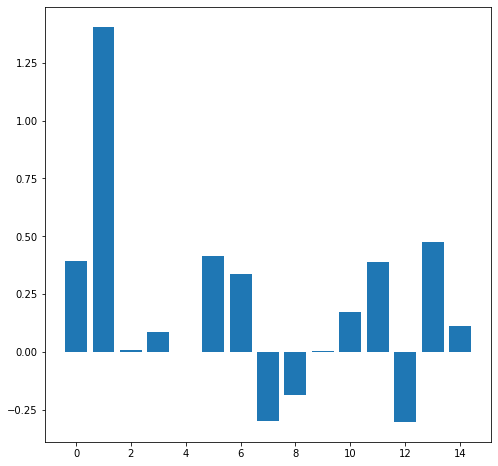

In [61]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
#X1, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=1)
# define the model
model1 = LogisticRegression()
# fit the model
model1.fit(X_train_log, y_train)
# get importance
importance = model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize = (8,8))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [114]:
model1.coef_[0]

array([ 0.1622204 , -0.00966135, -0.35478699, -0.12444819, -0.33330965,
        1.40616095, -0.16376391,  0.30194812,  0.33820694,  0.99384648,
        0.61266108,  0.12432746, -0.50570581, -0.01462841])

In [62]:
# P-values from Logistic Regression:

for x,y in zip(X_train.columns, model1.coef_[0]):
    print(x,': ', round(y,4))
          

Account-Balance1 :  0.3928
Duration-of-Credit-Month :  1.4057
Payment-Status-of-Previous-Credit1 :  0.0069
Credit-Amount :  0.0879
Value-Savings-Stocks1 :  -0.0002
Length-of-current-employment1 :  0.4142
Instalment-per-cent :  0.3386
Most-valuable-available-asset :  -0.299
Age-years :  -0.1836
Type-of-apartment :  0.004
No-of-Credits-at-this-Bank1 :  0.1751
Purpose_Home Related :  0.3905
Purpose_New car :  -0.3022
Purpose_Used car :  0.475


In [63]:
for i in zip(X_train.columns, importance):
    print(i)

('Account-Balance1', 0.39282957954320735)
('Duration-of-Credit-Month', 1.4057045833017145)
('Payment-Status-of-Previous-Credit1', 0.00685458543126113)
('Credit-Amount', 0.08785389088919329)
('Value-Savings-Stocks1', -0.00018853610267741317)
('Length-of-current-employment1', 0.41417982474490317)
('Instalment-per-cent', 0.3385671550301781)
('Most-valuable-available-asset', -0.2989630545649879)
('Age-years', -0.18364428483708725)
('Type-of-apartment', 0.003985373076421932)
('No-of-Credits-at-this-Bank1', 0.17507947196918222)
('Purpose_Home Related', 0.39049791636858877)
('Purpose_New car', -0.3021822128587127)
('Purpose_Used car', 0.47495143628084086)


C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature: 0, Score: -0.00875
Feature: 1, Score: -0.36091
Feature: 2, Score: -0.13174
Feature: 3, Score: -0.30731
Feature: 4, Score: 1.39959
Feature: 5, Score: -0.17018
Feature: 6, Score: 0.28798
Feature: 7, Score: 0.33432
Feature: 8, Score: 1.07858
Feature: 9, Score: 0.56154
Feature: 10, Score: 0.10430
Feature: 11, Score: -0.52598
Feature: 12, Score: -0.00148


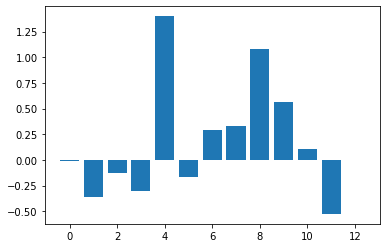

In [38]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [126]:
importance

array([ 0.1622204 , -0.00966135, -0.35478699, -0.12444819, -0.33330965,
        1.40616095, -0.16376391,  0.30194812,  0.33820694,  0.99384648,
        0.61266108,  0.12432746, -0.50570581, -0.01462841])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.732


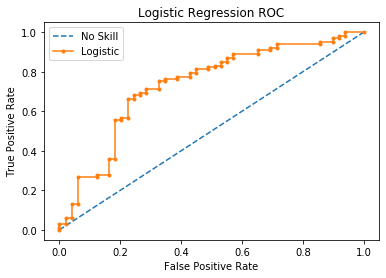

In [64]:

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
#model = LogisticRegression(solver='lbfgs')
#model.fit(trainX, y_train)
# predict probabilities
lr_probs = model1.predict_proba(X_test_log)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# Title
pyplot.title("Logistic Regression ROC")
# show the plot
pyplot.show()

In [65]:
len(ns_probs)

150

In [66]:
len(y_train)

350

# Decision Trees Classifier

In [67]:
DTC = DecisionTreeClassifier(random_state=0)
cross_val_score(DTC, X_train, y_train, cv=10)

array([0.71428571, 0.71428571, 0.71428571, 0.68571429, 0.74285714,
       0.54285714, 0.6       , 0.57142857, 0.57142857, 0.68571429])

In [68]:
# Fit the model on the training data:
DTC.fit(X_train, y_train)
#predict the results for test
y_pred_DC = DTC.predict(X_test)
#test the accuracy
round(accuracy_score(y_test, y_pred_DC),3)*100

68.0

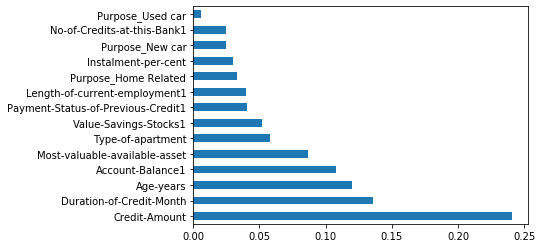

In [69]:
# Selecting the most important features based on the model:
#clf = DecisionTreeClassifier(random_state=0)
feat_importances_DT = pd.Series(DTC.feature_importances_, index= X_train.columns)
feat_importances_DT = feat_importances_DT.nlargest(20)
feat_importances_DT.plot(kind='barh')

In [70]:
feat_importances_DT

Credit-Amount                         0.240952
Duration-of-Credit-Month              0.135501
Age-years                             0.120131
Account-Balance1                      0.107979
Most-valuable-available-asset         0.086644
Type-of-apartment                     0.058264
Value-Savings-Stocks1                 0.051602
Payment-Status-of-Previous-Credit1    0.040189
Length-of-current-employment1         0.039857
Purpose_Home Related                  0.032948
Instalment-per-cent                   0.030043
Purpose_New car                       0.025057
No-of-Credits-at-this-Bank1           0.024730
Purpose_Used car                      0.006102
dtype: float64

No handles with labels found to put in legend.


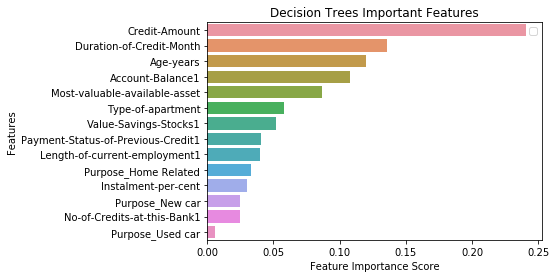

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feat_importances_DT, y=feat_importances_DT.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Decision Trees Important Features")
plt.legend()
plt.show()

In [72]:
len(DTC.feature_importances_)

14

In [73]:
len(X_train.columns)

14

In [74]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix , classification_report
cm_DTC = confusion_matrix(y_test, y_pred_DC)
print(cm_DTC)
print(classification_report(y_test, y_pred_DC))

[[23 26]
 [22 79]]
              precision    recall  f1-score   support

           0       0.51      0.47      0.49        49
           1       0.75      0.78      0.77       101

    accuracy                           0.68       150
   macro avg       0.63      0.63      0.63       150
weighted avg       0.67      0.68      0.68       150



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.626


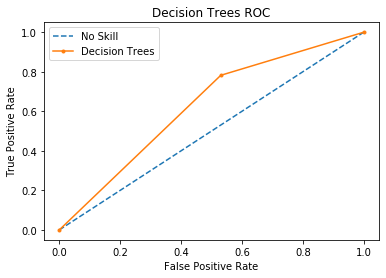

In [75]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = DTC.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Trees')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# Title
pyplot.title("Decision Trees ROC")
# show the plot
pyplot.show()

# Random Forest Classifer

In [76]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X_train,y_train)

y_pred_RFC=RF.predict(X_test)

In [77]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Random Forest Accuracy:",round(metrics.accuracy_score(y_test, y_pred_RFC), 3)*100)

Random Forest Accuracy: 75.3


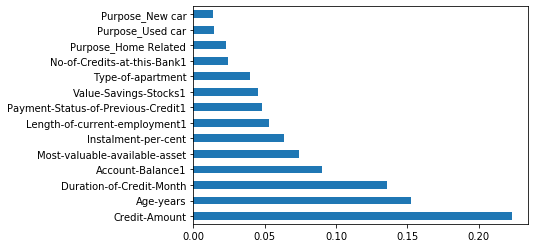

In [78]:
# Selecting the most important features based on the model:
feat_importances = pd.Series(RF.feature_importances_, index= X_train.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [79]:
feature_imp_RF = pd.Series(RF.feature_importances_, index= X_train.columns).sort_values(ascending=False)
feature_imp_RF

Credit-Amount                         0.223379
Age-years                             0.152690
Duration-of-Credit-Month              0.135560
Account-Balance1                      0.090021
Most-valuable-available-asset         0.073831
Instalment-per-cent                   0.063342
Length-of-current-employment1         0.053039
Payment-Status-of-Previous-Credit1    0.047989
Value-Savings-Stocks1                 0.044966
Type-of-apartment                     0.039624
No-of-Credits-at-this-Bank1           0.024042
Purpose_Home Related                  0.022842
Purpose_Used car                      0.014704
Purpose_New car                       0.013972
dtype: float64

No handles with labels found to put in legend.


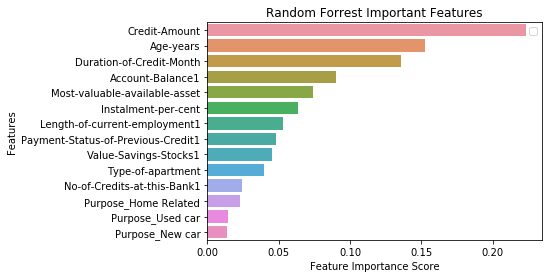

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp_RF, y=feature_imp_RF.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Random Forrest Important Features")
plt.legend()
plt.show()

In [81]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix , classification_report
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
print(cm_RFC)
print(classification_report(y_test, y_pred_RFC))

[[16 33]
 [ 4 97]]
              precision    recall  f1-score   support

           0       0.80      0.33      0.46        49
           1       0.75      0.96      0.84       101

    accuracy                           0.75       150
   macro avg       0.77      0.64      0.65       150
weighted avg       0.76      0.75      0.72       150



No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.739


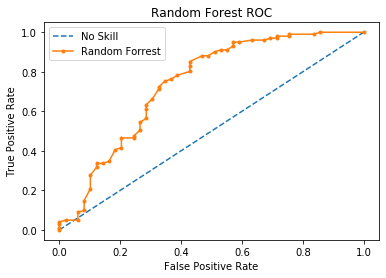

In [82]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = RF.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forrest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# Title
pyplot.title("Random Forest ROC")
# show the plot
pyplot.show()

# Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

GB = GradientBoostingClassifier(random_state=0)
GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)

print("Gradient Boosting Accuracy:", round(GB.score(X_test, y_test),4)*100)


Gradient Boosting Accuracy: 74.67


In [84]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_GB)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.67


In [85]:
feature_imp_GB = pd.Series(GB.feature_importances_, index= X_train.columns).sort_values(ascending=False)
feature_imp_GB

Credit-Amount                         0.341029
Account-Balance1                      0.177830
Duration-of-Credit-Month              0.165006
Age-years                             0.076532
Payment-Status-of-Previous-Credit1    0.045616
Length-of-current-employment1         0.043490
Type-of-apartment                     0.036610
Most-valuable-available-asset         0.031653
Value-Savings-Stocks1                 0.024908
Instalment-per-cent                   0.023354
Purpose_New car                       0.015713
Purpose_Home Related                  0.011685
Purpose_Used car                      0.005423
No-of-Credits-at-this-Bank1           0.001150
dtype: float64

No handles with labels found to put in legend.


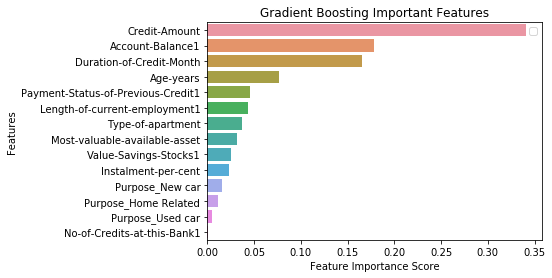

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp_GB, y=feature_imp_GB.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Gradient Boosting Important Features")
plt.legend()
plt.show()

In [128]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix , classification_report
cm_GB = confusion_matrix(y_test, y_pred_GB)
print(cm_GB)
print(classification_report(y_test, y_pred_GB))

[[18 31]
 [ 7 94]]
              precision    recall  f1-score   support

           0       0.72      0.37      0.49        49
           1       0.75      0.93      0.83       101

    accuracy                           0.75       150
   macro avg       0.74      0.65      0.66       150
weighted avg       0.74      0.75      0.72       150



No Skill: ROC AUC=0.500
Gradient Boosting: ROC AUC=0.732


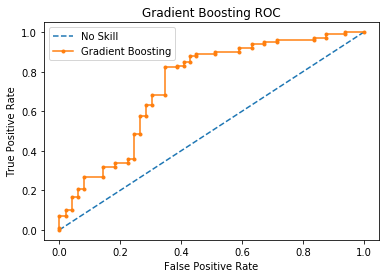

In [87]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = GB.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gradient Boosting: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Gradient Boosting')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# Title
pyplot.title("Gradient Boosting ROC")
# show the plot
pyplot.show()

# Optimizing the Model Based on Feature Importance Report:


In [63]:
X1_Optimized = X1[['Credit-Amount1', 'Age-years1', 'Duration-of-Credit-Month','Account-Balance1', 
    'Most-valuable-available-asset','Instalment-per-cent']]
X1_Optimized.head()

,Credit-Amount1,Age-years1,Duration-of-Credit-Month,Account-Balance1,Most-valuable-available-asset,Instalment-per-cent
0,-0.603128,-0.226621,4,1,1,1
1,-0.603128,-0.578789,4,1,1,1
2,-0.585451,0.565759,4,1,1,2
3,0.063644,0.125548,4,1,1,1
4,-1.010050,-0.754874,6,0,1,4


In [180]:
X1_Optimized = X1[[ 'Duration-of-Credit-Month',
       'Credit-Amount1', 'Instalment-per-cent', 'Most-valuable-available-asset',
       'Age-years1', 'No-of-dependents', 'Account-Balance1',
       'Payment-Status-of-Previous-Credit1', 'Value-Savings-Stocks1',
       'Length-of-current-employment1', 'Purpose_New car', 'Purpose_Used car']]
X1_Optimized.head()

,Duration-of-Credit-Month,Credit-Amount1,Instalment-per-cent,Most-valuable-available-asset,Age-years1,No-of-dependents,Account-Balance1,Payment-Status-of-Previous-Credit1,Value-Savings-Stocks1,Length-of-current-employment1,Purpose_New car,Purpose_Used car
0,4,-0.603128,1,1,-0.226621,2,1,2,2,0,0,0
1,4,-0.603128,1,1,-0.578789,2,1,2,2,0,0,0
2,4,-0.585451,2,1,0.565759,2,1,0,0,1,0,0
3,4,0.063644,1,1,0.125548,2,1,0,0,1,0,0
4,6,-1.010050,4,1,-0.754874,1,0,2,0,0,0,0


In [181]:
X1_Optimized.shape

(500, 12)

In [182]:
y = training4['Credit-Application-Result1']
y.value_counts()

1    358
0    142
Name: Credit-Application-Result1, dtype: int64

In [183]:
# Splitting the dataset into the Training set and Test set

X_train_OPT, X_test_OPT, y_train_OPT, y_test_OPT = train_test_split(X1_Optimized , y, test_size = 0.3, random_state = 0)


# Logistic Regression 2

In [184]:
# Adding a constant to X_test
X_test_log = sm.add_constant(X_test_OPT)
X_train_log = sm.add_constant(X_train_OPT)

In [185]:
reg_log1 = sm.Logit(y_train, X_train_log)
result_log1 = reg_log1.fit()
result_log1.summary()

Optimization terminated successfully.
         Current function value: 0.465460
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     Credit-Application-Result1   No. Observations:                  350
Model:                                  Logit   Df Residuals:                      337
Method:                                   MLE   Df Model:                           12
Date:                        Fri, 03 Jul 2020   Pseudo R-squ.:                  0.1960
Time:                                17:12:31   Log-Likelihood:                -162.91
converged:                               True   LL-Null:                       -202.63
Covariance Type:                    nonrobust   LLR p-value:                 5.271e-12
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.2682      0.805      2.818      0.005       0.691       3.846
Duration-of-Credit-Month              -0.0082      0.014     -0.595      0.552      -0.035       0.019
Credit-Amount1                        -0.5564      0.202     -2.750      0.006      -0.953      -0.160
Instalment-per-cent                   -0.3744      0.147     -2.549      0.011      -0.662      -0.087
Most-valuable-available-asset         -0.1551      0.143     -1.081      0.280      -0.436       0.126
Age-years1                            -0.0080      0.147     -0.054      0.957      -0.296       0.280
No-of-dependents                      -0.3945      0.404     -0.978      0.328      -1.185       0.396
Account-Balance1                       1.5073      0.306      4.921      0.000       0.907       2.108
Payment-Status-of-Previous-Credit1    -0.1726      0.150     -1.152      0.249      -0.466       0.121
Value-Savings-Stocks1                  0.3012      0.166      1.819      0.069      -0.023       0.626
Length-of-current-employment1          0.3456      0.184      1.883      0.060      -0.014       0.705
Purpose_New car                        1.4569      0.616      2.366      0.018       0.250       2.664
Purpose_Used car                       0.1203      0.385      0.313      0.755      -0.634       0.875
======================================================================================================
"""

In [186]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# Fit the model on the training data:
model.fit(X_train_log,y_train)
#predict the results for test
y_pred_log = model.predict(X_test_log)
#test the accuracy
print('Accuracy Logistic: ', round(accuracy_score(y_test, y_pred_log), 3)*100)

Accuracy Logistic:  72.7


C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Decision Trees

In [187]:
DTC2 = DecisionTreeClassifier(random_state=0)
cross_val_score(DTC2, X_train_OPT, y_train_OPT, cv=10)

array([0.65714286, 0.57142857, 0.71428571, 0.68571429, 0.74285714,
       0.54285714, 0.65714286, 0.57142857, 0.6       , 0.65714286])

In [188]:
# Fit the model on the training data:
DTC2.fit(X_train_OPT, y_train_OPT)
#predict the results for test
y_pred_DC_OPT = DTC2.predict(X_test_OPT)
#test the accuracy
round(accuracy_score(y_test_OPT, y_pred_DC_OPT),3)*100

76.7

# Random Forrest

In [189]:
#Create a Gaussian Classifier
RF2=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF2.fit(X_train_OPT,y_train_OPT)

y_pred_RFC2=RF2.predict(X_test_OPT)

# Model Accuracy, how often is the classifier correct?
print("Random Forest Accuracy:",round(metrics.accuracy_score(y_test_OPT, y_pred_RFC2), 4)*100)

Random Forest Accuracy: 76.0


# Gradient Boosting

In [190]:

GB2 = GradientBoostingClassifier(random_state=0)
GB2.fit(X_train_OPT, y_train_OPT)
y_pred_GB2 = GB2.predict(X_test_OPT)

print("Gradient Boosting Accuracy:", round(GB2.score(X_test_OPT, y_test_OPT),4)*100)


Gradient Boosting Accuracy: 71.33


# Applying the Random Forrest Model to the validation Dataset

In [88]:
validation.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,None,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,None,4,4,23,Other Banks/Depts,1,1,1,1,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,None,4,3,31,Other Banks/Depts,2,1,1,1,1,1


# First we need to get the validation dataset in the same format as the test data to run the model on it

In [91]:
# Feature Engineering:

validation['Account-Balance1'] =validation['Account-Balance'].map({'No Account':0, 'Some Balance':1})
validation['Account-Balance1'].value_counts()

0    282
1    218
Name: Account-Balance1, dtype: int64

In [92]:
validation['Payment-Status-of-Previous-Credit1'] = validation['Payment-Status-of-Previous-Credit'].map({'No Problems (in this bank)':0, 'Some Problems':1, 'Paid Up':2})
validation['Payment-Status-of-Previous-Credit1'].value_counts()

2    272
0    176
1     52
Name: Payment-Status-of-Previous-Credit1, dtype: int64

In [100]:
validation['Value-Savings-Stocks1'] = validation['Value-Savings-Stocks'].map({'< £100':1, '£100-£1000':2, 'None':0})
validation['Length-of-current-employment1'] = validation['Length-of-current-employment'].map({'1-4 yrs':1, '< 1yr':0, '4-7 yrs':2})
validation['Guarantors1'] = validation['Guarantors'].map({'Yes':1, 'None':0} )
validation['No-of-Credits-at-this-Bank1']= validation['No-of-Credits-at-this-Bank'].map({'1':1, 'More than 1':2})
validation['No-of-Credits-at-this-Bank1'].value_counts()

1    313
2    187
Name: No-of-Credits-at-this-Bank1, dtype: int64

In [94]:
validation['Value-Savings-Stocks1'].value_counts()

0    300
2    145
1     55
Name: Value-Savings-Stocks1, dtype: int64

In [95]:
validation['Length-of-current-employment1'].value_counts()

0    291
2    131
1     78
Name: Length-of-current-employment1, dtype: int64

In [96]:
(validation['Guarantors1'].value_counts()/len(validation['Guarantors1']))*100

0    90.2
1     9.8
Name: Guarantors1, dtype: float64

In [97]:
X.columns

Index(['Account-Balance1', 'Duration-of-Credit-Month',
       'Payment-Status-of-Previous-Credit1', 'Credit-Amount',
       'Value-Savings-Stocks1', 'Length-of-current-employment1',
       'Instalment-per-cent', 'Most-valuable-available-asset', 'Age-years',
       'Type-of-apartment', 'No-of-Credits-at-this-Bank1',
       'Purpose_Home Related', 'Purpose_New car', 'Purpose_Used car'],
      dtype='object')

# Feature Selection

In [101]:
#training1.corr().to_excel('Training1_Correlation_Matrix.xlsx')

validation2 = validation[['Account-Balance1', 'Duration-of-Credit-Month',
       'Payment-Status-of-Previous-Credit1', 'Credit-Amount',
       'Value-Savings-Stocks1', 'Length-of-current-employment1',
       'Instalment-per-cent', 'Most-valuable-available-asset', 'Age-years',
       'Type-of-apartment', 'No-of-Credits-at-this-Bank1', 'Purpose']]
validation2.head()

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose
0,0,9,0,2799,0,0,2,1,36,1,2,Home Related
1,0,12,0,2122,0,0,3,1,39,1,2,Home Related
2,0,24,2,3758,2,0,1,4,23,1,1,Home Related
3,0,11,0,3905,0,0,2,1,36,1,2,Home Related
4,0,6,0,1957,0,1,1,3,31,2,1,Home Related


In [102]:
validation2['Purpose'].value_counts()

Home Related    354
Used car         94
New car          52
Name: Purpose, dtype: int64

In [103]:
validation3 = pd.get_dummies(validation2)
validation3.head(3)

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Used car
0,0,9,0,2799,0,0,2,1,36,1,2,1,0,0
1,0,12,0,2122,0,0,3,1,39,1,2,1,0,0
2,0,24,2,3758,2,0,1,4,23,1,1,1,0,0


In [104]:
len(validation3.columns)

14

In [201]:
# validation4 = validation3.drop(columns=['Type-of-apartment','Telephone', 'Foreign-Worker','Guarantors1', 'Purpose_Home Related'])

In [105]:

#X_val=validation4[['Duration-of-Credit-Month',
 #      'Credit-Amount', 'Instalment-per-cent', 'Most-valuable-available-asset',
  #     'Age-years', 'No-of-dependents', 'Account-Balance1',
   #    'Payment-Status-of-Previous-Credit1', 'Value-Savings-Stocks1',
    #   'Length-of-current-employment1', 'Purpose_New car', 'Purpose_Used car']]
X_val = validation3
X_val.head()

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Used car
0,0,9,0,2799,0,0,2,1,36,1,2,1,0,0
1,0,12,0,2122,0,0,3,1,39,1,2,1,0,0
2,0,24,2,3758,2,0,1,4,23,1,1,1,0,0
3,0,11,0,3905,0,0,2,1,36,1,2,1,0,0
4,0,6,0,1957,0,1,1,3,31,2,1,1,0,0


In [106]:
X_val

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Used car
0,0,9,0,2799,0,0,2,1,36,1,2,1,0,0
1,0,12,0,2122,0,0,3,1,39,1,2,1,0,0
2,0,24,2,3758,2,0,1,4,23,1,1,1,0,0
3,0,11,0,3905,0,0,2,1,36,1,2,1,0,0
4,0,6,0,1957,0,1,1,3,31,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,18,0,3966,0,2,1,1,33,1,2,1,0,0
496,0,12,1,6199,0,0,4,2,28,1,2,1,0,0
497,0,24,2,1987,0,0,2,1,21,1,1,1,0,0
498,0,24,2,2303,0,2,4,1,45,2,1,1,0,0


In [204]:
from sklearn import preprocessing
X_val['Credit-Amount1'] = preprocessing.scale(X_val['Credit-Amount'])
X_val['Age-years1'] = preprocessing.scale(X_val['Age-years'])

In [207]:
X_val = X1[[ 'Duration-of-Credit-Month',
       'Credit-Amount1', 'Instalment-per-cent', 'Most-valuable-available-asset',
       'Age-years1', 'No-of-dependents', 'Account-Balance1',
       'Payment-Status-of-Previous-Credit1', 'Value-Savings-Stocks1',
       'Length-of-current-employment1', 'Purpose_New car', 'Purpose_Used car']]
X_val

,Duration-of-Credit-Month,Credit-Amount1,Instalment-per-cent,Most-valuable-available-asset,Age-years1,No-of-dependents,Account-Balance1,Payment-Status-of-Previous-Credit1,Value-Savings-Stocks1,Length-of-current-employment1,Purpose_New car,Purpose_Used car
0,4,-0.603128,1,1,-0.226621,2,1,2,2,0,0,0
1,4,-0.603128,1,1,-0.578789,2,1,2,2,0,0,0
2,4,-0.585451,2,1,0.565759,2,1,0,0,1,0,0
3,4,0.063644,1,1,0.125548,2,1,0,0,1,0,0
4,6,-1.010050,4,1,-0.754874,1,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,60,1.491228,1,1,-0.226621,1,0,0,2,0,0,0
496,60,1.491228,1,1,-0.754874,1,0,0,2,0,0,0
497,60,2.106030,2,4,-0.754874,1,0,0,2,0,0,0
498,60,3.731949,2,4,2.414645,1,1,0,2,2,0,0


In [144]:
X_val.columns.tolist()

['Account-Balance1',
 'Duration-of-Credit-Month',
 'Payment-Status-of-Previous-Credit1',
 'Credit-Amount',
 'Value-Savings-Stocks1',
 'Length-of-current-employment1',
 'Instalment-per-cent',
 'Most-valuable-available-asset',
 'Age-years',
 'Type-of-apartment',
 'Telephone',
 'Purpose_Home Related',
 'Purpose_New car',
 'Purpose_Used car']

In [107]:
X_val['CreditWorthy']=RF.predict(X_val)
X_val

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Used car,CreditWorthy
0,0,9,0,2799,0,0,2,1,36,1,2,1,0,0,1
1,0,12,0,2122,0,0,3,1,39,1,2,1,0,0,1
2,0,24,2,3758,2,0,1,4,23,1,1,1,0,0,1
3,0,11,0,3905,0,0,2,1,36,1,2,1,0,0,1
4,0,6,0,1957,0,1,1,3,31,2,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,18,0,3966,0,2,1,1,33,1,2,1,0,0,1
496,0,12,1,6199,0,0,4,2,28,1,2,1,0,0,0
497,0,24,2,1987,0,0,2,1,21,1,1,1,0,0,0
498,0,24,2,2303,0,2,4,1,45,2,1,1,0,0,1


In [114]:
X_val['CreditWorthy_LogReg']=model.predict(X_val)
X_val

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Used car,CreditWorthy,CreditWorthy_LogReg
0,0,9,0,2799,0,0,2,1,36,1,2,1,0,0,1,1
1,0,12,0,2122,0,0,3,1,39,1,2,1,0,0,1,1
2,0,24,2,3758,2,0,1,4,23,1,1,1,0,0,1,1
3,0,11,0,3905,0,0,2,1,36,1,2,1,0,0,1,1
4,0,6,0,1957,0,1,1,3,31,2,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,18,0,3966,0,2,1,1,33,1,2,1,0,0,1,1
496,0,12,1,6199,0,0,4,2,28,1,2,1,0,0,0,1
497,0,24,2,1987,0,0,2,1,21,1,1,1,0,0,0,1
498,0,24,2,2303,0,2,4,1,45,2,1,1,0,0,1,1


In [115]:
X_val['CreditWorthy_LogReg'].value_counts()

1    500
Name: CreditWorthy_LogReg, dtype: int64

In [120]:
X_val['CreditWorthy_GradBoost']=GB.predict(X_val.iloc[:,1:15])
X_val

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Used car,CreditWorthy,CreditWorthy_LogReg,CreditWorthy_GradBoost
0,0,9,0,2799,0,0,2,1,36,1,2,1,0,0,1,1,1
1,0,12,0,2122,0,0,3,1,39,1,2,1,0,0,1,1,1
2,0,24,2,3758,2,0,1,4,23,1,1,1,0,0,1,1,1
3,0,11,0,3905,0,0,2,1,36,1,2,1,0,0,1,1,1
4,0,6,0,1957,0,1,1,3,31,2,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,18,0,3966,0,2,1,1,33,1,2,1,0,0,1,1,1
496,0,12,1,6199,0,0,4,2,28,1,2,1,0,0,0,1,1
497,0,24,2,1987,0,0,2,1,21,1,1,1,0,0,0,1,1
498,0,24,2,2303,0,2,4,1,45,2,1,1,0,0,1,1,1


In [121]:
X_val['CreditWorthy_GradBoost'].value_counts()

1    500
Name: CreditWorthy_GradBoost, dtype: int64

In [122]:
X_val['CreditWorthy_DecisionTrees']=DTC.predict(X_val.iloc[:,1:15])
X_val

,Account-Balance1,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit1,Credit-Amount,Value-Savings-Stocks1,Length-of-current-employment1,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank1,Purpose_Home Related,Purpose_New car,Purpose_Used car,CreditWorthy,CreditWorthy_LogReg,CreditWorthy_GradBoost,CreditWorthy_DecisionTrees
0,0,9,0,2799,0,0,2,1,36,1,2,1,0,0,1,1,1,1
1,0,12,0,2122,0,0,3,1,39,1,2,1,0,0,1,1,1,1
2,0,24,2,3758,2,0,1,4,23,1,1,1,0,0,1,1,1,1
3,0,11,0,3905,0,0,2,1,36,1,2,1,0,0,1,1,1,1
4,0,6,0,1957,0,1,1,3,31,2,1,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,18,0,3966,0,2,1,1,33,1,2,1,0,0,1,1,1,1
496,0,12,1,6199,0,0,4,2,28,1,2,1,0,0,0,1,1,1
497,0,24,2,1987,0,0,2,1,21,1,1,1,0,0,0,1,1,1
498,0,24,2,2303,0,2,4,1,45,2,1,1,0,0,1,1,1,1


In [123]:
X_val['CreditWorthy_DecisionTrees'].value_counts()

1    500
Name: CreditWorthy_DecisionTrees, dtype: int64

In [108]:
X_val['CreditWorthy'].value_counts()

1    422
0     78
Name: CreditWorthy, dtype: int64

In [109]:
X_val['CreditWorthy'].value_counts()/len(X_val)

1    0.844
0    0.156
Name: CreditWorthy, dtype: float64

In [110]:
training['Credit-Application-Result'].value_counts()

Creditworthy        358
Non-Creditworthy    142
Name: Credit-Application-Result, dtype: int64

In [111]:
training['Credit-Application-Result'].value_counts()/len(training)

Creditworthy        0.716
Non-Creditworthy    0.284
Name: Credit-Application-Result, dtype: float64

In [112]:
X1.columns.tolist()

NameError: name 'X1' is not defined

In [157]:
X1_val2 = X_val[['Credit-Amount1', 'Age-years1', 'Duration-of-Credit-Month','Account-Balance1', 
    'Most-valuable-available-asset','Instalment-per-cent']]
X1_val2

,Credit-Amount1,Age-years1,Duration-of-Credit-Month,Account-Balance1,Most-valuable-available-asset,Instalment-per-cent
0,-0.178858,0.033140,9,0,1,2
1,-0.420355,0.298973,12,0,1,3
2,0.163233,-1.118800,24,0,4,1
3,0.215671,0.033140,11,0,1,2
4,-0.479213,-0.409914,6,0,3,1
...,...,...,...,...,...,...
495,0.237431,-0.232692,18,0,1,1
496,1.033979,-0.675746,12,0,2,4
497,-0.468512,-1.296022,24,0,1,2
498,-0.355789,0.830638,24,0,1,4
